In [1]:
import urllib.request

url = 'https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=1'  # Use dl=1 to directly download without viewing in the browser
destination = 'dataset.zip'

urllib.request.urlretrieve(url, destination)


('dataset.zip', <http.client.HTTPMessage at 0x7ae21d41d810>)

In [2]:
import zipfile

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('')  # Extract the contents to the current directory


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np


In [6]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


In [7]:
train_generator = train_data_gen.flow_from_directory(
	'train',
	target_size=(48, 48),
	batch_size=64,
	color_mode="grayscale",
	class_mode='categorical')


Found 28709 images belonging to 7 classes.


In [8]:
validation_generator = validation_data_gen.flow_from_directory(
		'test',
		target_size=(48, 48),
		batch_size=64,
		color_mode="grayscale",
		class_mode='categorical')


Found 7178 images belonging to 7 classes.


In [9]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
						input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.summary()

cv2.ocl.setUseOpenCL(False)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,
							decay_rate=0.96)

optimizer = Adam(learning_rate=lr_schedule)

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,
					metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [10]:
emotion_model_info = emotion_model.fit_generator(
		train_generator,
		steps_per_epoch=28709 // 64,
		epochs=30,
		validation_data=validation_generator,
		validation_steps=7178 // 64)


<ipython-input-10-87e5f75970e7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/30
448/448 [==============================] - 382s 848ms/step - loss: 1.8076 - accuracy: 0.2556 - val_loss: 1.7293 - val_accuracy: 0.3238
Epoch 2/30
448/448 [==============================] - 357s 798ms/step - loss: 1.6410 - accuracy: 0.3585 - val_loss: 1.5443 - val_accuracy: 0.4106
Epoch 3/30
448/448 [==============================] - 357s 798ms/step - loss: 1.5291 - accuracy: 0.4087 - val_loss: 1.4556 - val_accuracy: 0.4414
Epoch 4/30
448/448 [==============================] - 354s 789ms/step - loss: 1.4593 - accuracy: 0.4378 - val_loss: 1.3951 - val_accuracy: 0.4696
Epoch 5/30
448/448 [==============================] - 376s 839ms/step - loss: 1.4026 - accuracy: 0.4662 - val_loss: 1.3493 - val_accuracy: 0.4890
Epoch 6/30
448/448 [==============================] - 373s 833ms/step - loss: 1.3455 - accuracy: 0.4876 - val_loss: 1.3021 - val_accuracy: 0.5042
Epoch 7/30
448/448 [==============================] - 353s 789ms/step - loss: 1.3024 - accuracy: 0.5066 - val_loss: 1.2686 -

In [11]:
emotion_model.evaluate(validation_generator)


113/113 [==============================] - 33s 295ms/step - loss: 1.0664 - accuracy: 0.6134


[1.0663920640945435, 0.6134020686149597]

In [12]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']


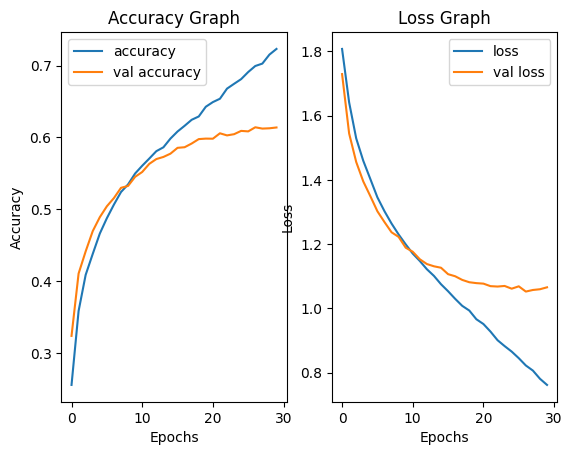

In [13]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [3]:

model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
	json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')


NameError: name 'emotion_model' is not defined

In [3]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful",
				3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}


In [6]:
from tensorflow.keras.models import model_from_json
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)


In [7]:
!pip install opencv-python==4.7.0.68


In [8]:
import cv2
import numpy as np

cap=cv2.VideoCapture(0,cv2.CAP_DSHOW)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    print("Retrieved frame:", ret)  # Add this line to check the value of ret
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        print(ret)
        continue

    # Create a face detector
    face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Retrieved frame: False


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [13]:
import cv2
import numpy as np
from keras.models import model_from_json

# Load the pre-trained facial emotion recognition model from the JSON file
with open('emotion_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
emotion_model = model_from_json(loaded_model_json)
# Load weights into the model
emotion_model.load_weights("emotion_model.h5")  # Assuming weights are stored in emotion_model.h5

# Define emotion labels
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}



cap=cv2.VideoCapture(0,cv2.CAP_DSHOW)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    print("Retrieved frame:", ret)  # Add this line to check the value of ret
    # frame = cv2.resize(frame, (1280, 720))
    frame = cv2.resize(frame, (500,300))
    if not ret:
        print(ret)
        continue

    # Create a face detector
    face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Retrieved frame: False


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [4]:
import cv2
import numpy as np
from keras.models import model_from_json

# Load the pre-trained facial emotion recognition model from the JSON file
with open('emotion_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
emotion_model = model_from_json(loaded_model_json)
# Load weights into the model
emotion_model.load_weights("emotion_model.h5")  # Assuming weights are stored in emotion_model.h5

# Define emotion labels
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

# Create a face detector
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the video capture object
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Unable to open camera.")
    exit()

# Loop for capturing and processing frames
while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    
    # Check if the frame is retrieved successfully
    if not ret:
        print("Error: Unable to retrieve frame.")
        break
    
    # Resize the frame
    frame = cv2.resize(frame, (500, 300))
    
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # Process each detected face
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # Predict emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Display the processed frame
    cv2.imshow('Emotion Detection', frame)
    
    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 28ms/step


KeyboardInterrupt: 